# This notebook will serve for the initial EDA for the listings data for the TFW project

## 1. Start with loading the dataset

In [142]:
# Import necassary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

ROOT = os.environ.get('PWD')

In [143]:
# load dataset
df_listings = pd.read_csv('../data/listings_20210707.csv')

In [144]:
# Shape of the dataset
print('The dataset contains %s different accommodations and %s features' %(df_listings.shape[0], df_listings.shape[1]))

The dataset contains 30269 different accommodations and 49 features


In [145]:
# Have a first look at the dataset
df_listings.head()

,listing_id,customer_id,state,contract_end,zip,country_title,region,subregion,holiday_region,property_type,...,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,pets,living_area
0,97232bc1-cee6-54cc-9965-be13177051d3,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,182--,Deutschland,Ostsee,Mecklenburgische Ostseeküste,Ostsee,holiday_apartment,...,yes,yes,yes,no,yes,1.0,2.0,4.0,0.0,60
1,b2e43b01-0a74-5270-95db-e4f649982e72,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,875--,Deutschland,Allgäu,Oberallgäu,Oberallgäu,holiday_apartment,...,yes,yes,yes,no,yes,1.0,1.0,4.0,0.0,50
2,892f4fda-e0e8-5a9b-bbed-29f82942ff9a,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,237--,Deutschland,Ostsee,Lübecker Bucht,Ostsee,holiday_apartment,...,yes,yes,yes,yes,no,1.0,2.0,6.0,0.0,77
3,e190ea0f-c688-5aa8-ae38-d0aeebdeec65,6e5e6ab0-34d3-5662-9259-7ae7eb021acb,Online,2022-05-01,274--,Deutschland,Nordsee,Cuxhaven & Umgebung,Nordsee,holiday_apartment,...,yes,yes,yes,no,yes,1.0,2.0,6.0,0.0,80
4,67e29a5f-1299-535c-ab06-d5c3ae750e9f,350d46c1-2a43-5053-a33c-40cd3a4c8b95,Online,2022-04-01,243--,Deutschland,Ostsee,Geltinger Bucht,Ostsee,holiday_apartment,...,yes,yes,yes,yes,no,1.0,2.0,4.0,0.0,60


In [146]:
# First look at the info
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30269 entries, 0 to 30268
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      30269 non-null  object 
 1   customer_id                     30269 non-null  object 
 2   state                           30269 non-null  object 
 3   contract_end                    30269 non-null  object 
 4   zip                             30269 non-null  object 
 5   country_title                   30269 non-null  object 
 6   region                          30269 non-null  object 
 7   subregion                       30268 non-null  object 
 8   holiday_region                  30269 non-null  object 
 9   property_type                   30269 non-null  object 
 10  subscription                    30269 non-null  object 
 11  binding_inquiry                 30269 non-null  object 
 12  option_allergic                 

In [147]:
# First description of the numerical features
df_listings.describe()

,bathrooms,bedrooms,max_guests,pets
count,29839.000000,29839.000000,29839.000000,29839.0
mean,1.124971,1.503234,4.427963,0.0
std,0.467131,0.921612,2.452340,0.0
min,0.000000,0.000000,1.000000,0.0
25%,1.000000,1.000000,3.000000,0.0
50%,1.000000,1.000000,4.000000,0.0
75%,1.000000,2.000000,5.000000,0.0
max,14.000000,17.000000,70.000000,0.0


In [148]:
# Looking for categorical features
df_listings.nunique()

listing_id                        30269
customer_id                       19835
state                                 3
contract_end                         78
zip                                 302
country_title                         1
region                               29
subregion                           196
holiday_region                       29
property_type                        25
subscription                          2
binding_inquiry                       2
option_allergic                       4
option_non_smoking_only               4
option_holiday_with_your_pet          4
option_holiday_with_your_horse        4
option_holiday_with_your_dog          4
option_close_to_the_beach             3
option_railway_station                2
option_airport                        2
option_wheelchair_accessible          3
option_family_travel                  4
option_close_to_the_water             3
option_holiday_with_your_baby         4
option_long_term_holiday              4


The dataset contains many categorical features that we need to process further.

## 2. First cleaning steps

Like Traum-Ferienwohnungen told, we've got a dataset with accomodations located in Germany as we can see in the feature country_title. Because of this, we can drop this column.

In [149]:
# Drop the column country_title
df_listings = df_listings.drop('country_title', axis=1)

The feature `pets` includes only missing values and zeros. In my opinion, this column records the number of pets that are allowed. If pets are allowed or not (or on request) are covered in following columns: `option_holiday_with_your_pet`, `option_holiday_with_your_horse`, `option_holiday_with_your_dog`. For this reason, we decided to drop this column too.

In [150]:
# Drop the column pets
print(df_listings.pets.unique())
df_listings = df_listings.drop('pets', axis=1)

[ 0. nan]


## 3. Feature converting

First, convert the date feature `contract_end` to datetime.

In [151]:
# Convert column contract_end to datetime
df_listings['contract_end'] = pd.to_datetime(df_listings['contract_end'])

The feature `living_area` contains values with range. Like Traum-Ferienwohnungen recommends, we take the first number as correct one and convert them to integers.

In [152]:
# Replace range of `living_area` with the first number
df_listings.replace(['70-280', '50-100', '50-70', '24-49', '16 - 26', '70-280', '18 - 26', '88-100', '46-73', '50-80', '52-65', '50-60'], ['70', '50', '50', '24', '16', '70', '18', '88', '46', '50', '52', '50'], inplace=True)

In [153]:
# Convert column `living_area`to integer
df_listings['living_area'] = df_listings['living_area'].astype(float)

To use the option features in the model, we convert the booleans / categories to integers as following:

- False / no / Not allowed >> 0
- True / yes / Allowed >> 1
- On request >> 2
- Unset >> 3

In [154]:
# Replacement to integers 
df_listings.replace(['False', 'no', 'not allowed', 'True', 'yes', 'allowed', 'on request', 'unset'], [0, 0, 0, 1, 1, 1, 2, 3], inplace=True)

## 4. Coordinates

In [155]:
# Load the dataset
df_zipcode = pd.read_csv('../data/plz_geocoord.csv', delimiter=';')

In [156]:
# Rename the unnamed column
df_zipcode.rename(columns={"Unnamed: 0": "zip"}, inplace=True)

In [157]:
# Remove last two digits in the feature postal_code to merge with dataset listings
df_zipcode['zip'] = df_zipcode['zip'].floordiv(100)

In [158]:
# Add leading zeros to postal code to get a postal code of 5 digits
df_zipcode['zip'] = df_zipcode['zip'].apply(lambda x: '{0:0>3}'.format(x))

In [159]:
# Replace comma with dot
df_zipcode = df_zipcode.apply(lambda x: x.str.replace(',','.'))

In [160]:
# Convert latitude and longitude to numerical values
df_zipcode['lat'] = pd.to_numeric(df_zipcode['lat'])
df_zipcode['lng'] = pd.to_numeric(df_zipcode['lng'])

In [161]:
# groupby zipcode to calculate the mean for latitude and longitude
df_zipcode = df_zipcode.groupby('zip').mean().reset_index()

In [162]:
# Export csv master zipcode
#df_zipcode.to_csv('../data/master_zipcode_20210715.csv')

In [163]:
# Replace comma with dot in dataset listings for merging
df_listings['zip'] = df_listings['zip'].apply(lambda x: x.replace('--',''))

In [164]:
# merge both datasets listings and zipcode
df_listings = pd.merge(df_listings, df_zipcode, how='left', on='zip')

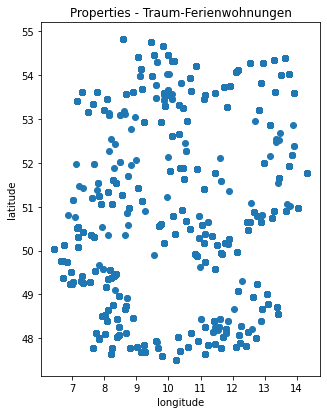

In [165]:
# Plot for checking if everything looks fine
# Extract the data we're interested in
fig, ax = plt.subplots(figsize=(5,6.5))
lat, lon = df_listings['lat'], df_listings['lng']
#properties, zipcode = df_listings['listing_id'], df_listings['zip']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat)
#plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.title('Properties - Traum-Ferienwohnungen');

## 5. Looking for correlations

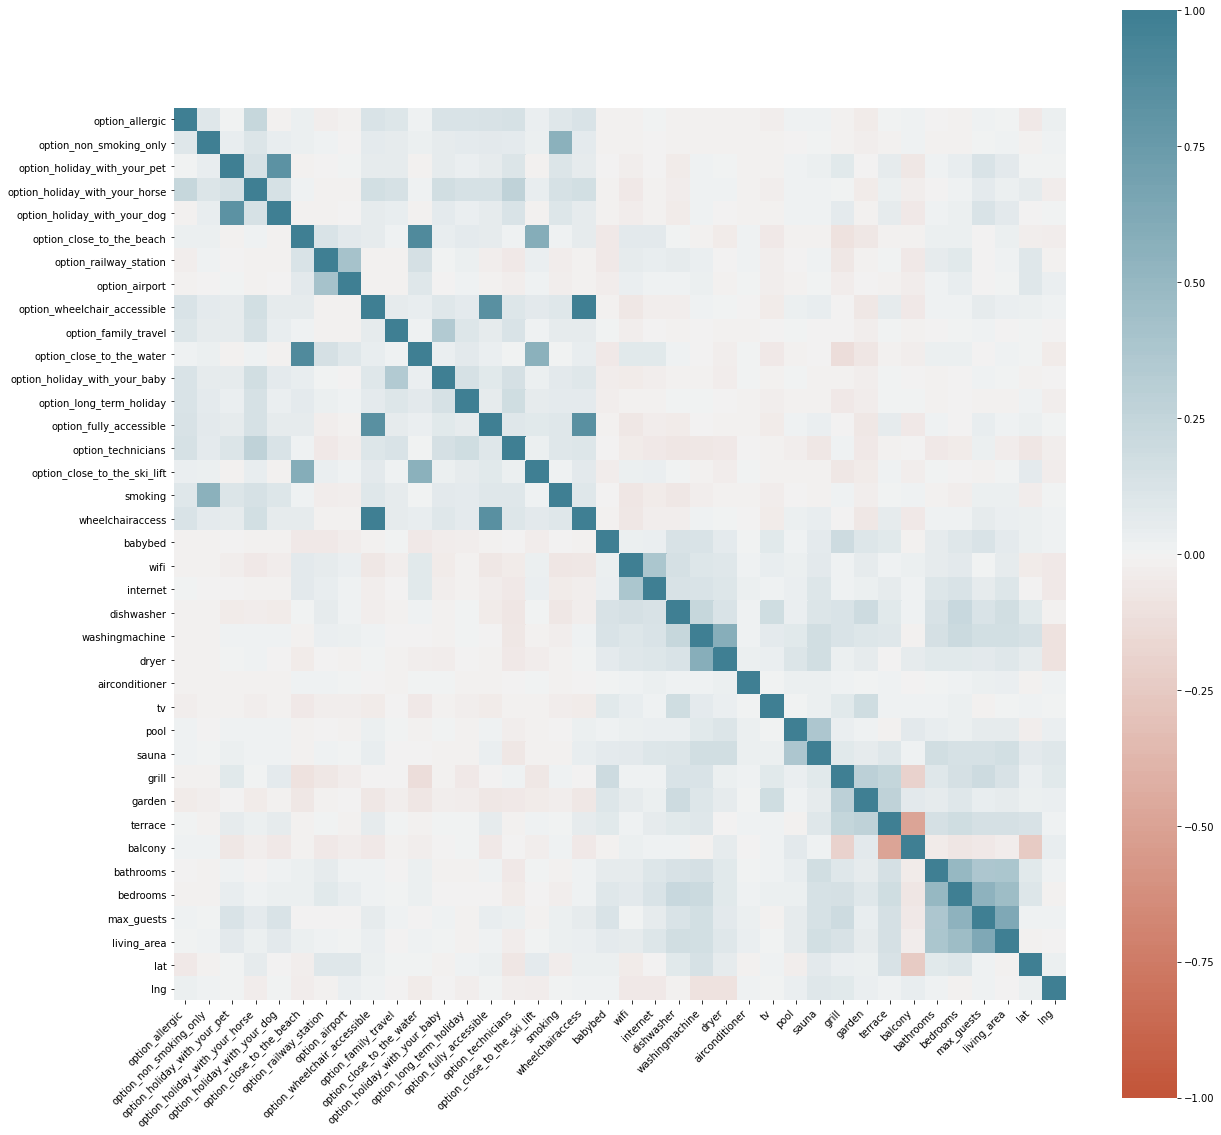

In [166]:
# generate the heatmap
corr = df_listings.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [167]:
# Generate table with correlations 
corr.style.background_gradient(cmap='coolwarm')

,option_allergic,option_non_smoking_only,option_holiday_with_your_pet,option_holiday_with_your_horse,option_holiday_with_your_dog,option_close_to_the_beach,option_railway_station,option_airport,option_wheelchair_accessible,option_family_travel,option_close_to_the_water,option_holiday_with_your_baby,option_long_term_holiday,option_fully_accessible,option_technicians,option_close_to_the_ski_lift,smoking,wheelchairaccess,babybed,wifi,internet,dishwasher,washingmachine,dryer,airconditioner,tv,pool,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,living_area,lat,lng
option_allergic,1.000000,0.101161,0.004128,0.227050,-0.015263,0.030383,-0.024078,-0.018192,0.132091,0.101872,0.016305,0.120809,0.127983,0.139634,0.146624,0.037823,0.088802,0.132091,-0.018304,-0.020945,0.003857,-0.015154,-0.014286,-0.010603,-0.011778,-0.030187,0.017280,0.011424,-0.013179,-0.043089,0.003432,0.012568,-0.007142,-0.011288,0.016597,0.000811,-0.051762,0.028677
option_non_smoking_only,0.101161,1.000000,0.041090,0.112182,0.039284,0.027046,0.008467,-0.007738,0.063741,0.051407,0.026072,0.058642,0.067127,0.073159,0.067330,0.026413,0.567786,0.063741,-0.014780,-0.022077,-0.001288,-0.021874,-0.013559,-0.008407,-0.008573,-0.018092,-0.005840,0.004619,-0.022206,-0.029938,-0.011839,0.014031,-0.008902,-0.008774,0.002915,0.014255,-0.013542,0.018572
option_holiday_with_your_pet,0.004128,0.041090,1.000000,0.141271,0.821877,-0.019797,-0.001050,0.001434,0.052508,0.049383,-0.020168,0.059030,0.033842,0.049312,0.116757,-0.022882,0.110126,0.052508,-0.000314,-0.026420,-0.002015,-0.041188,0.021625,0.000611,-0.009589,-0.015356,0.012991,0.028691,0.083433,-0.007776,0.061947,-0.066268,0.018413,0.044567,0.119571,0.075089,0.005665,0.005069
option_holiday_with_your_horse,0.227050,0.112182,0.141271,1.000000,0.147950,0.019766,-0.022763,-0.012314,0.166429,0.142210,0.017917,0.172579,0.143726,0.147914,0.280355,0.045781,0.140681,0.166429,-0.013056,-0.055524,-0.014800,-0.033757,0.014005,0.014136,-0.011933,-0.029104,0.014050,0.015239,0.005745,-0.041073,0.024963,-0.024914,-0.002313,0.008116,0.068145,0.027554,0.054242,-0.034477
option_holiday_with_your_dog,-0.015263,0.039284,0.821877,0.147950,1.000000,-0.011998,-0.014517,-0.002691,0.059398,0.042429,-0.015896,0.068638,0.034261,0.047399,0.119383,-0.019975,0.105035,0.059398,-0.009673,-0.034239,-0.013231,-0.046492,0.014673,-0.001444,-0.008119,-0.015188,0.012671,0.023021,0.069166,-0.015689,0.049820,-0.053404,0.008471,0.030503,0.118335,0.070441,-0.002048,0.002051
option_close_to_the_beach,0.030383,0.027046,-0.019797,0.019766,-0.011998,1.000000,0.127434,0.073195,0.054826,0.021376,0.883133,0.040279,0.067301,0.051591,0.012209,0.586346,0.007843,0.054826,-0.058593,0.072958,0.076245,0.006089,-0.013147,-0.039151,0.010011,-0.052639,-0.016171,-0.010174,-0.101491,-0.068127,-0.009112,-0.019757,0.026233,0.025459,-0.002346,0.024971,-0.024954,-0.033338
option_railway_station,-0.024078,0.008467,-0.001050,-0.022763,-0.014517,0.127434,1.000000,0.408525,-0.018754,-0.013979,0.155613,0.000020,0.024426,-0.024444,-0.055829,0.035517,-0.037998,-0.018754,-0.053409,0.058404,0.042691,0.046917,0.035227,-0.006616,0.008114,-0.024815,-0.002319,0.021445,-0.067190,-0.019328,0.003128,-0.049691,0.047155,0.078349,-0.007093,0.018065,0.100754,-0.018357
option_airport,-0.018192,-0.007738,0.001434,-0.012314,-0.002691,0.073195,0.408525,1.000000,-0.009617,-0.009700,0.096944,-0.002095,0.014858,-0.020108,-0.023509,0.022899,-0.024388,-0.009617,-0.034500,0.032201,0.015689,0.022101,0.023602,-0.014344,0.003780,-0.025336,-0.010119,0.006959,-0.033204,-0.005923,-0.009727,-0.031828,0.021407,0.043067,-0.005920,0.004381,0.100216,0.032199
option_wheelchair_accessible,0.132091,0.063741,0.052508,0.166429,0.059398,0.054826,-0.018754,-0.009617,1.000000,0.050452,0.041542,0.086460,0.067581,0.838437,0.106250,0.074523,0.091266,1.000000,-0.010488,-0.065034,-0.026216,-0.030359,0.008601,0.002719,-0.004838,-0.045726,0.025347,0.044819,-0.004355,-0.070255,0.055723,-0.051206,0.014784,0.010496,0.057494,0.03167

## 6. Plotting distribution of the features

### State

<AxesSubplot:>

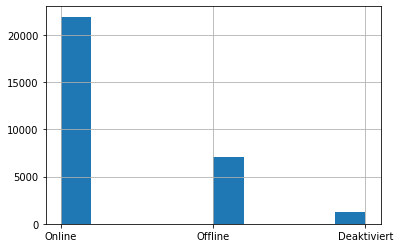

In [168]:
# Plotting the feature state
df_listings.state.hist()

### Contract end

<AxesSubplot:>

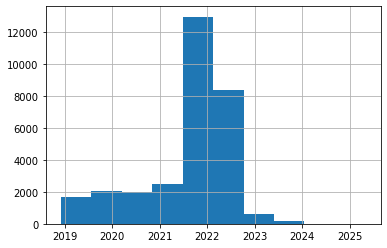

In [169]:
# Plotting the feature contract end
df_listings.contract_end.hist()

### Histogram numerical features

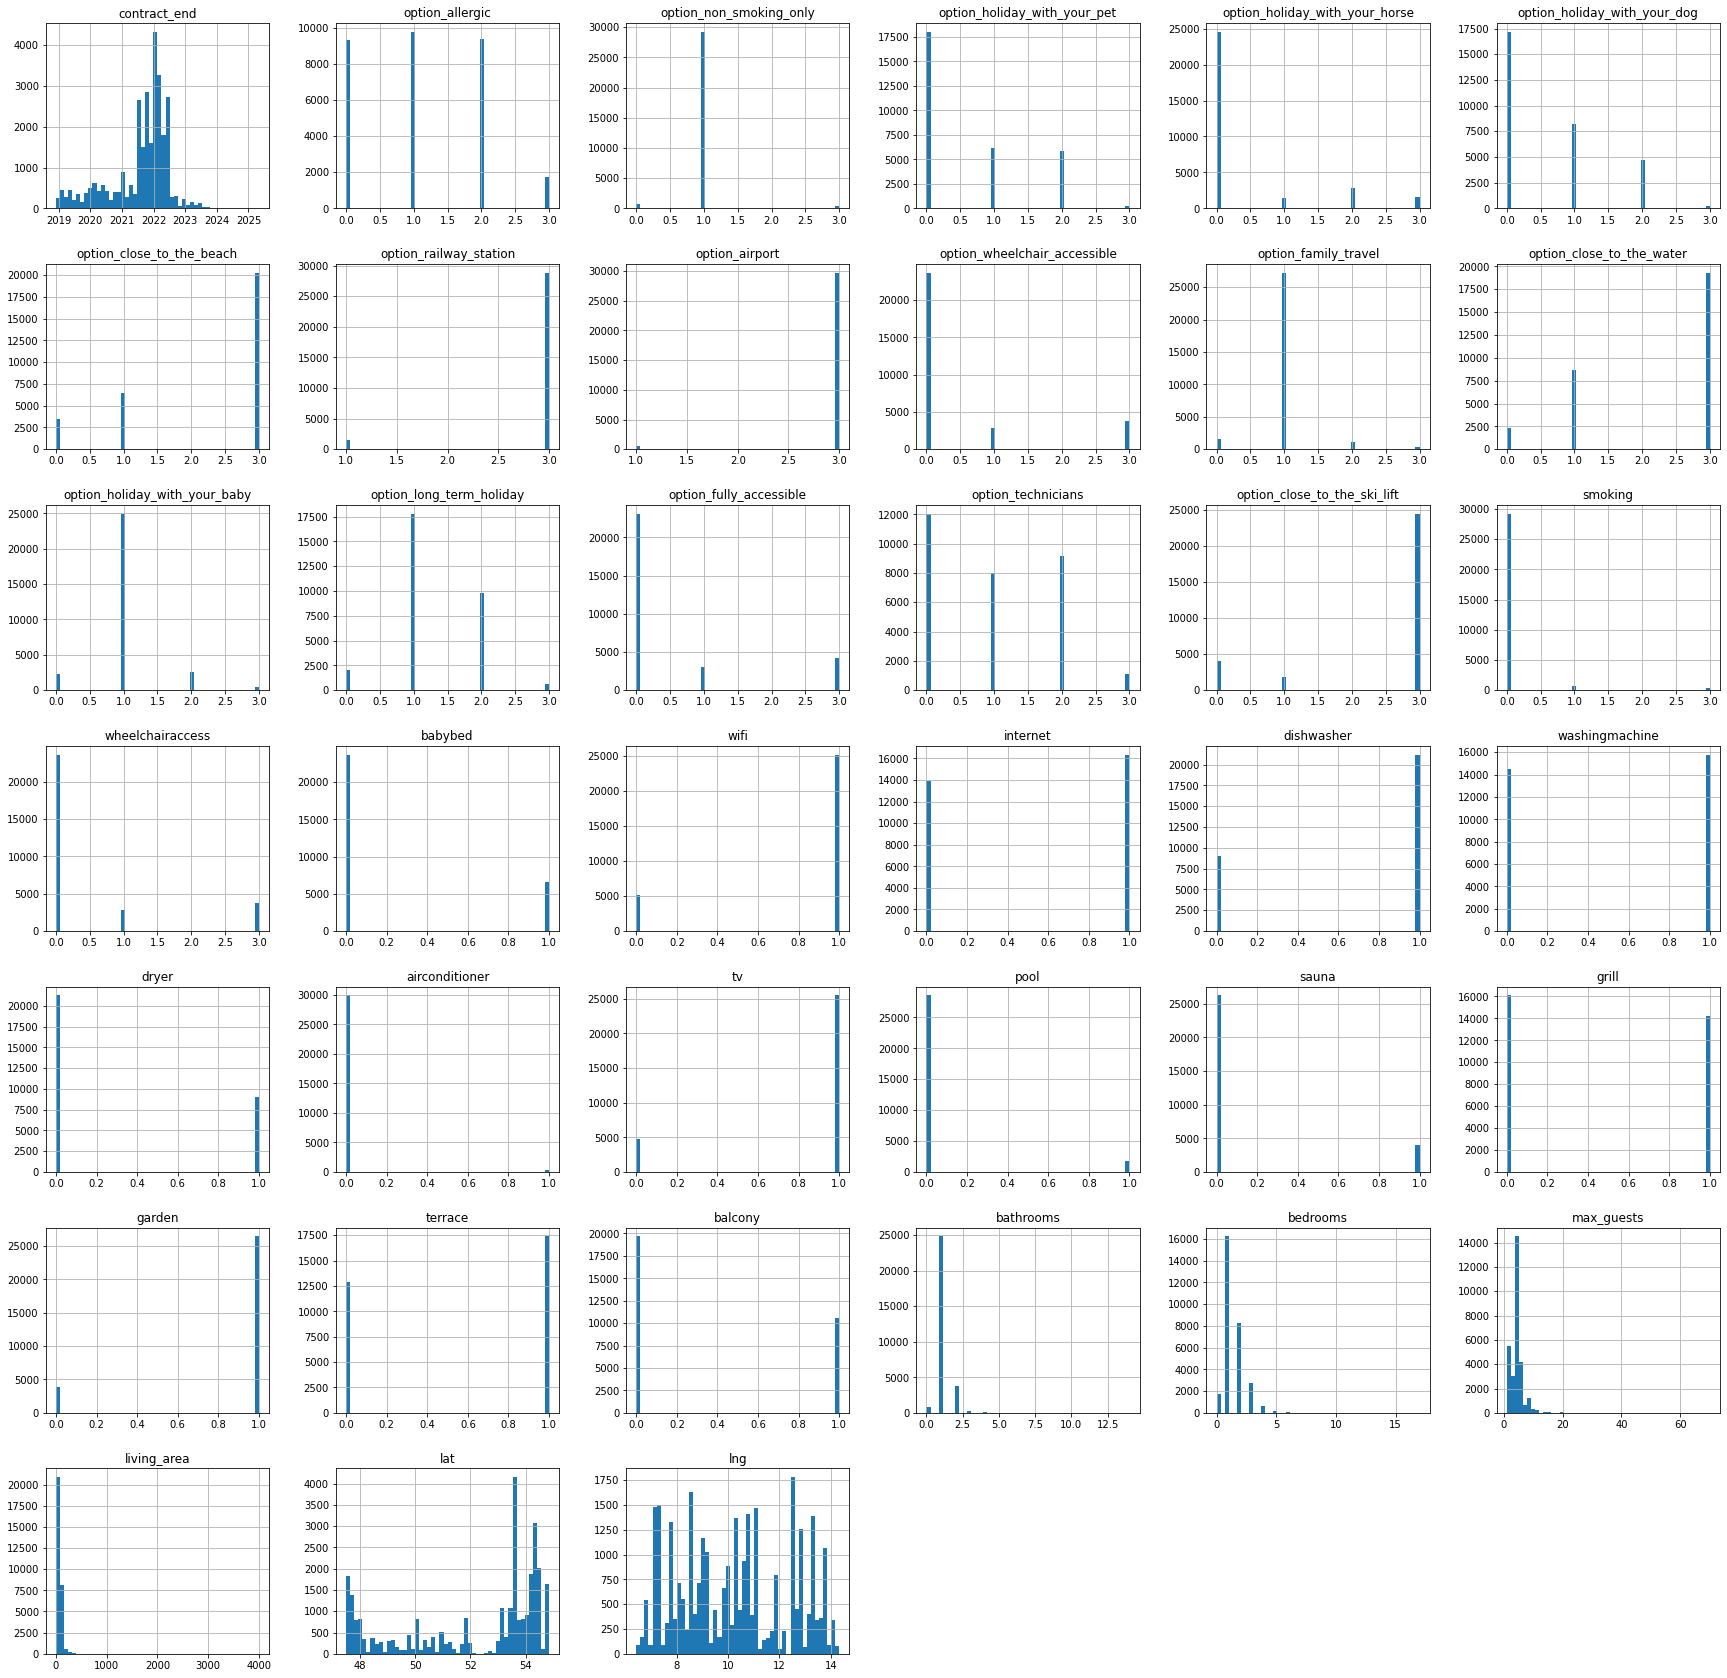

In [170]:
# Plotting histograms of numerical features 
df_listings.hist(bins=50, figsize = (30,30))
plt.show()

### Checking similarity in some features

In [171]:
# Count values for categories
print('option_non_smoking_only:\n', df_listings['option_non_smoking_only'].value_counts())
print('smoking:\n',df_listings['smoking'].value_counts())

option_non_smoking_only:
 1    29225
0      648
3      395
2        1
Name: option_non_smoking_only, dtype: int64
smoking:
 0    29225
1      648
3      396
Name: smoking, dtype: int64


In [172]:
# Create a sub dataset that contains only True / False values for the columns
smoking = df_listings.query("option_non_smoking_only == [0 ,1] & smoking == [1, 0]")

In [173]:
# Check for contrary columns 
comparison_column_smoking = np.where(smoking["option_non_smoking_only"] != smoking["smoking"], True, False)
print(np.all(comparison_column_smoking))

True


In [174]:
# Drop the column wheelchairaccess
df_listings = df_listings.drop('smoking', axis=1)

3. The histograms of features `close_to_the_beach` and `close_to_the_water` look very similar. All accommodations close to the beach are close to the water too. But because the differences between close to the water and close to the beach, like a dike, a habour or a lake are important for guests, we stay with both features.


4. For the features `close_to_the_beach`, `close_to_the_water`, `option_close_to_the_skilift`, `option_railway_station` and `option_airport` the amount of unset values is high: 

In [175]:
# Calculate amount of unset values
print('Percent of unset values in feature')
print('Beach nearby:', round(df_listings.query('option_close_to_the_beach == 3').count()[1]/df_listings.shape[0]*100, 1))
print('Water nearby:', round(df_listings.query('option_close_to_the_water == 3').count()[1]/df_listings.shape[0]*100, 1))
print('Ski lift nearby:', round(df_listings.query('option_close_to_the_ski_lift == 3').count()[1]/df_listings.shape[0]*100, 1))
print('Railway station:', round(df_listings.query('option_railway_station == 3').count()[1]/df_listings.shape[0]*100, 1))
print('Airport:', round(df_listings.query('option_airport == 3').count()[1]/df_listings.shape[0]*100, 1))

Percent of unset values in feature
Beach nearby: 67.0
Water nearby: 63.8
Ski lift nearby: 80.7
Railway station: 95.2
Airport: 98.2


Because of high number of unset values in the features `option_railway_station` (95.2%) and `option_airport` (98.2%) we will drop these columns because it gives us no important information. At the moment we will keep the features ` option_close_to_the_beach` (67%), `option_close_to_the_water` (63.8%) and `option_close_to_the_ski_lift` (80.7%) because they could be important for the clsutering model and these features are an important information for the guest to decide for their right accommodation.

In [176]:
# Drop the column option_railway_station and option_airport
df_listings = df_listings.drop(['option_railway_station', 'option_airport'], axis=1)

5. We decided to keep only the information internet and not the single features `wifi` and `internet`. Because it's important to know if a property have internet and not which kind of internet. For this reason we change a no / 0 for feature `internet` to yes / 1, if in the feature `wifi` is a yes / 1.

In [177]:
# Replace value from column internet with column wifi
df_listings['internet'] = np.where(df_listings['internet'] == 0, df_listings['wifi'], df_listings['internet'])

In [178]:
# Drop the column wifi
df_listings = df_listings.drop('wifi', axis=1)

6. There are similar property types like holiday_apartment and apartment. A check with Traum-Ferienwohnungen confirmed these properties are the same and we can combine them.

In [179]:
# Look at different property types
df_listings.property_type.unique()

array(['holiday_apartment', 'holiday_houses', 'apartment', 'bungalow',
       'villa', 'farmhouses', 'cottage', 'holiday_room', 'vineyard',
       'hotel', 'pension', 'chalet', 'organic_farm', 'holiday_cottage',
       'house_boat', 'guesthouse', 'holiday_farmhouses', 'terraced_house',
       'b_und_b', 'trailer', 'guestroom', 'alpine_hut', 'castle',
       'residence', 'inn'], dtype=object)

In [180]:
# Combine the similar property types
df_listings['property_type'].replace({'apartment': 'holiday_apartment', 'holiday_farmhouses':'farmhouses', 'holiday_room': 'guestroom', 'guesthouse': 'holiday_houses', 'holiday_cottage':'cottage'}, inplace=True)

### Bedrooms

In [181]:
# Description of the feature bathrooms
df_listings.bathrooms.describe()

count    29839.000000
mean         1.124971
std          0.467131
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: bathrooms, dtype: float64

In [182]:
# Number of accommodation per bathroom number
df_listings.groupby('bathrooms')['listing_id'].count()

bathrooms
0.0       886
1.0     24817
2.0      3787
3.0       269
4.0        57
5.0        12
6.0         7
8.0         2
10.0        1
14.0        1
Name: listing_id, dtype: int64

We have a few accommodations with a high number of bathrooms and we have to decide how we want to handle this.

In [183]:
# Because of a higher correlation between the numerical features, we're looking for the median value for all features per bathroom number to see if there is a connection 
numerical_features = df_listings[['bathrooms', 'bedrooms', 'max_guests', 'living_area']]
numerical_features.groupby('bathrooms').median()

,bedrooms,max_guests,living_area
bathrooms,,,
0.0,1.0,4.0,61.5
1.0,1.0,4.0,62.0
2.0,3.0,6.0,105.0
3.0,3.0,8.0,150.0
4.0,4.0,12.0,226.5
5.0,6.0,16.0,300.0
6.0,5.0,20.0,335.0
8.0,10.5,21.5,525.0
10.0,9.0,27.0,500.0


### Bedrooms

In [184]:
# Description of the feature bedrooms
df_listings.bedrooms.describe()

count    29839.000000
mean         1.503234
std          0.921612
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: bedrooms, dtype: float64

In [185]:
# Number of accommodation per bedroom number
df_listings.groupby('bedrooms')['listing_id'].count()

bedrooms
0.0      1767
1.0     16222
2.0      8231
3.0      2749
4.0       627
5.0       148
6.0        47
7.0        27
8.0        10
9.0         4
11.0        4
12.0        1
16.0        1
17.0        1
Name: listing_id, dtype: int64

In [186]:
# Because of a higher correlation between the numerical features, we're looking for the median value for all features per bedroom number to see if there is a connection 
numerical_features.groupby('bedrooms').median()

,bathrooms,max_guests,living_area
bedrooms,,,
0.0,1.0,2.0,36.0
1.0,1.0,4.0,60.0
2.0,1.0,4.0,75.0
3.0,2.0,6.0,105.0
4.0,2.0,8.0,140.0
5.0,2.0,10.5,180.0
6.0,2.0,14.0,220.0
7.0,2.0,16.0,220.0
8.0,3.5,20.5,300.0


With a higher number of bedrooms the number of bathrooms, maximum guests and living area also increase.

### Maximum guests

In [187]:
# Description of the feature maximum guests
df_listings.max_guests.describe()

count    29839.000000
mean         4.427963
std          2.452340
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         70.000000
Name: max_guests, dtype: float64

In [188]:
# Number of accommodation per maximum guest number
df_listings.groupby('max_guests')['listing_id'].count()

max_guests
1.0        24
2.0      5433
3.0      3042
4.0     11242
5.0      3260
6.0      4181
7.0       618
8.0      1048
9.0       153
10.0      295
11.0       62
12.0      153
13.0       31
14.0       72
15.0       27
16.0       51
17.0       10
18.0       25
19.0        7
20.0       26
21.0        5
22.0        9
23.0        5
24.0        7
25.0        9
26.0        6
27.0        4
28.0        2
29.0        1
30.0        9
31.0        1
32.0        3
33.0        2
34.0        3
35.0        1
36.0        2
39.0        3
40.0        2
42.0        1
50.0        2
55.0        1
70.0        1
Name: listing_id, dtype: int64

In [189]:
# Because of a higher correlation between the numerical features, we're looking for the median value for all features per maximum guests number to see if there is a connection 
numerical_features.groupby('max_guests').median()

,bathrooms,bedrooms,living_area
max_guests,,,
1.0,1.0,0.0,24.0
2.0,1.0,1.0,47.0
3.0,1.0,1.0,50.0
4.0,1.0,1.0,65.0
5.0,1.0,2.0,75.0
6.0,1.0,2.0,95.0
7.0,1.0,3.0,105.0
8.0,2.0,3.0,125.0
9.0,2.0,3.0,130.0


With a higher number of maximum guests the number of bathrooms, bedrooms and living area increase not constantly. There is no pattern.

### Living area

In [190]:
# Description of the feature maximum guests
df_listings.living_area.describe()

count    29837.000000
mean        75.759526
std         51.459410
min          1.000000
25%         50.000000
50%         65.000000
75%         89.000000
max       4000.000000
Name: living_area, dtype: float64

### Regions

#### Regions

In [191]:
# Number and names of region
print(' Number of different regions:', df_listings.region.nunique())
print(df_listings.region.unique())

 Number of different regions: 29
['Ostsee' 'Allgäu' 'Nordsee' 'Rhön' 'Schwarzwald' 'Oberfranken'
 'Lüneburger Heide' 'Harz' 'Mosel' 'Ostbayern' 'Eifel'
 'Mecklenburgische Seenplatte' 'Oberbayern' 'Neunkirchen' 'Pfalz'
 'Saar-Hunsrück' 'Spreewald' 'Thüringer Wald' 'Sauerland' 'Bodensee'
 'Sächsische Schweiz' 'Saarlouis & Umgebung' 'Saarschleifenland'
 'Erzgebirge' 'Landkreis Waldeck-Frankenberg' 'Unterfranken'
 'Bostalsee - St. Wendeler Land' 'Saarbrücken & Umgebung' 'Saar-Pfalz']


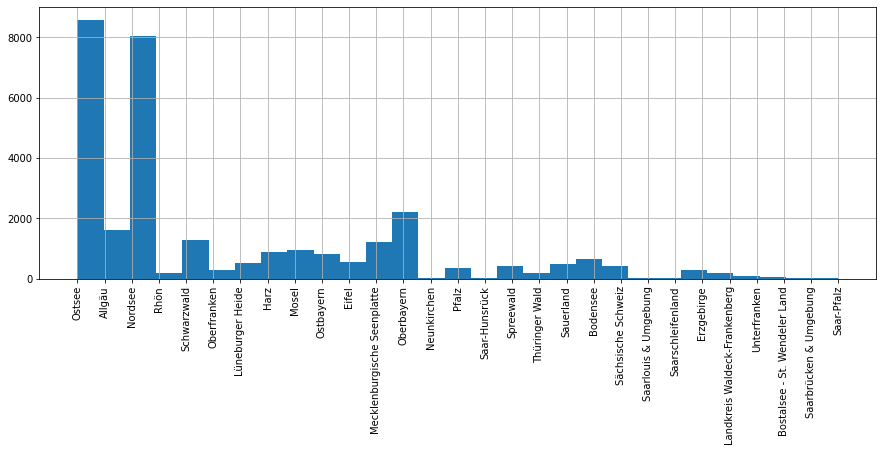

In [192]:
# Distribution
fig, ax = plt.subplots(figsize=(15,5))
df_listings.region.hist(bins= 29)
plt.xticks(rotation='vertical');

In [193]:
# Sort regions by highest value
df_listings.groupby('region')['listing_id'].count().sort_values(ascending=False)

region
Ostsee                           8580
Nordsee                          8050
Oberbayern                       2201
Allgäu                           1624
Schwarzwald                      1277
Mecklenburgische Seenplatte      1212
Mosel                             952
Harz                              888
Ostbayern                         811
Bodensee                          649
Eifel                             533
Lüneburger Heide                  509
Sauerland                         478
Spreewald                         408
Sächsische Schweiz                400
Pfalz                             363
Oberfranken                       299
Erzgebirge                        286
Thüringer Wald                    191
Rhön                              180
Landkreis Waldeck-Frankenberg     178
Unterfranken                       70
Bostalsee - St. Wendeler Land      36
Saarschleifenland                  20
Saar-Hunsrück                      19
Saar-Pfalz                         16
Saarb

#### Subregions

In [194]:
# Number and names of subregions
print('Number of different subregions:', df_listings.subregion.nunique())
print(df_listings.subregion.unique())

Number of different subregions: 196
['Mecklenburgische Ostseeküste' 'Oberallgäu' 'Lübecker Bucht'
 'Cuxhaven & Umgebung' 'Geltinger Bucht' 'Hessische Rhön'
 'Nordfriesische Inseln' 'Südschwarzwald' 'Bamberg & Umgebung'
 'Heidekreis' 'Nordharz' 'Trier & Umgebung' 'Bayerischer Wald'
 'Vulkaneifel' 'Ostfriesische Inseln' 'Nordfriesland' 'Wangerland'
 'Fischland-Darß-Zingst' 'Schlei' 'Mittlerer Schwarzwald'
 'Mecklenburg-Strelitz' 'Berchtesgadener Land' 'Neunkirchen/Saar'
 'Südharz' 'Usedom' 'Ferienregion Traben-Trarbach' 'Dithmarschen'
 'Ostfriesland' 'Tegernsee-Schliersee' 'Pfälzerwald'
 'Halbinsel Eiderstedt' 'Rügen' 'Ferienland Bernkastel-Kues' 'Kaiserstuhl'
 'Müritz' 'Zugspitz-Region' 'Ostallgäu' 'Jadebusen' 'Losheim am See'
 'Vorpommern' 'Straupitz' 'Rennsteig' 'Kaiserslautern' 'Hochsauerland'
 'Fränkische Schweiz' 'Butjadingen' 'Brockengebiet' 'Deutsche Weinstraße'
 'Lübbenau' 'Lüneburg' 'Untersee' 'Nordheide' 'Römische Weinstraße'
 'Westheide' 'Pfaffenwinkel' 'Ammersee' 'Chiemgau'


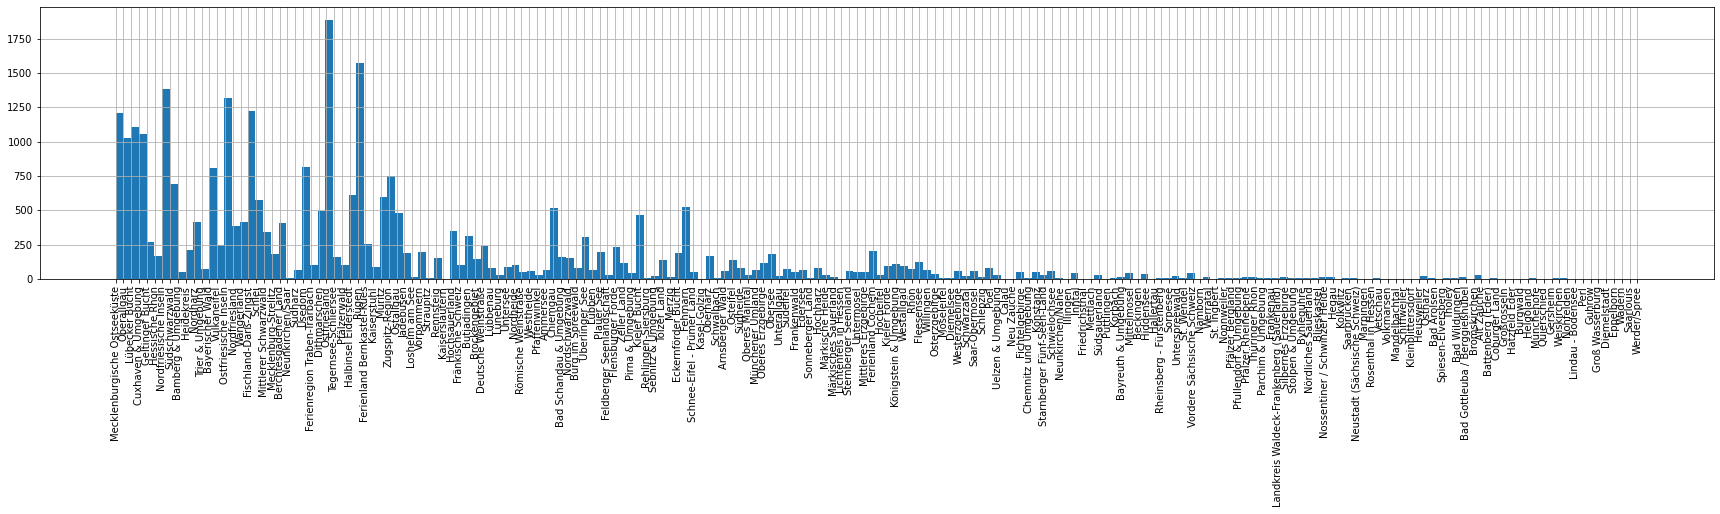

In [195]:
# Distribution
fig, ax = plt.subplots(figsize=(30,5))
df_listings.subregion.hist(bins=196)
plt.xticks(rotation='vertical');

In [196]:
# Sort subregion by highest value
df_listings.groupby('subregion')['listing_id'].count().sort_values(ascending=False)

subregion
Ostfriesland             1885
Rügen                    1576
Nordfriesische Inseln    1386
Ostfriesische Inseln     1315
Fischland-Darß-Zingst    1221
                         ... 
Kaiserslautern              1
Illingen                    1
Saarlouis                   1
Helgoland                   1
Namborn                     1
Name: listing_id, Length: 196, dtype: int64

#### Holiday region

In [197]:
# Number and names of holiday regions
print('Number of different holdiday regions:', df_listings.holiday_region.nunique())
print(df_listings.holiday_region.unique())

Number of different holdiday regions: 29
['Ostsee' 'Oberallgäu' 'Nordsee' 'Rhön' 'Sylt' 'Schwarzwald' 'Oberfranken'
 'Lüneburger Heide' 'Föhr' 'Harz' 'Mosel' 'Bayerischer Wald' 'Eifel'
 'Nordfriesland' 'Mecklenburgische Seenplatte' 'Oberbayern' 'Saarland'
 'Dithmarschen' 'Pfalz' 'Müritz' 'Allgäu' 'Amrum' 'Spreewald'
 'Thüringer Wald' 'Sauerland' 'Bodensee' 'Sächsische Schweiz' 'Erzgebirge'
 'Landkreis Waldeck-Frankenberg']


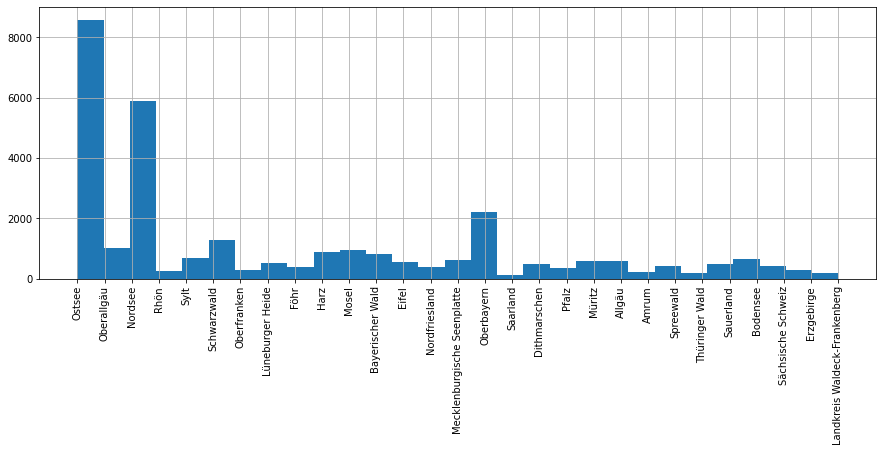

In [198]:
# Distribution
fig, ax = plt.subplots(figsize=(15,5))
df_listings.holiday_region.hist(bins=29)
plt.xticks(rotation='vertical');

In [199]:
# Sort holiday region by highest value
df_listings.groupby('holiday_region')['listing_id'].count().sort_values(ascending=False)

holiday_region
Ostsee                           8580
Nordsee                          5883
Oberbayern                       2201
Schwarzwald                      1277
Oberallgäu                       1029
Mosel                             952
Harz                              888
Bayerischer Wald                  811
Sylt                              687
Bodensee                          649
Mecklenburgische Seenplatte       615
Müritz                            597
Allgäu                            595
Eifel                             533
Lüneburger Heide                  509
Dithmarschen                      496
Sauerland                         478
Spreewald                         408
Sächsische Schweiz                400
Nordfriesland                     386
Föhr                              379
Pfalz                             363
Oberfranken                       299
Erzgebirge                        286
Rhön                              250
Amrum                             2

#### postal code

In [200]:
# Number and names of zipcodes
print('Number of different zipcodes:', df_listings.zip.nunique())
print(df_listings.zip.unique())

Number of different zipcodes: 302
['182' '875' '237' '274' '243' '361' '259' '798' '960' '296' '065' '542'
 '934' '545' '265' '386' '258' '264' '183' '796' '777' '945' '172' '834'
 '665' '063' '174' '568' '257' '837' '668' '248' '267' '185' '544' '792'
 '824' '876' '263' '942' '874' '666' '173' '159' '236' '543' '987' '676'
 '239' '186' '599' '913' '269' '387' '674' '032' '217' '213' '783' '212'
 '273' '823' '985' '869' '833' '672' '776' '961' '266' '018' '722' '030'
 '887' '940' '249' '276' '886' '242' '193' '667' '017' '268' '836' '287'
 '235' '171' '765' '944' '181' '595' '832' '567' '677' '293' '598' '064'
 '781' '924' '953' '852' '094' '880' '962' '868' '791' '753' '963' '345'
 '965' '588' '351' '194' '941' '563' '794' '535' '272' '881' '977' '225'
 '797' '170' '855' '840' '538' '768' '083' '388' '546' '344' '295' '998'
 '448' '184' '721' '951' '793' '763' '854' '091' '779' '374' '784' '821'
 '562' '241' '912' '573' '163' '830' '534' '175' '662' '244' '663' '234'
 '574' '360' '955

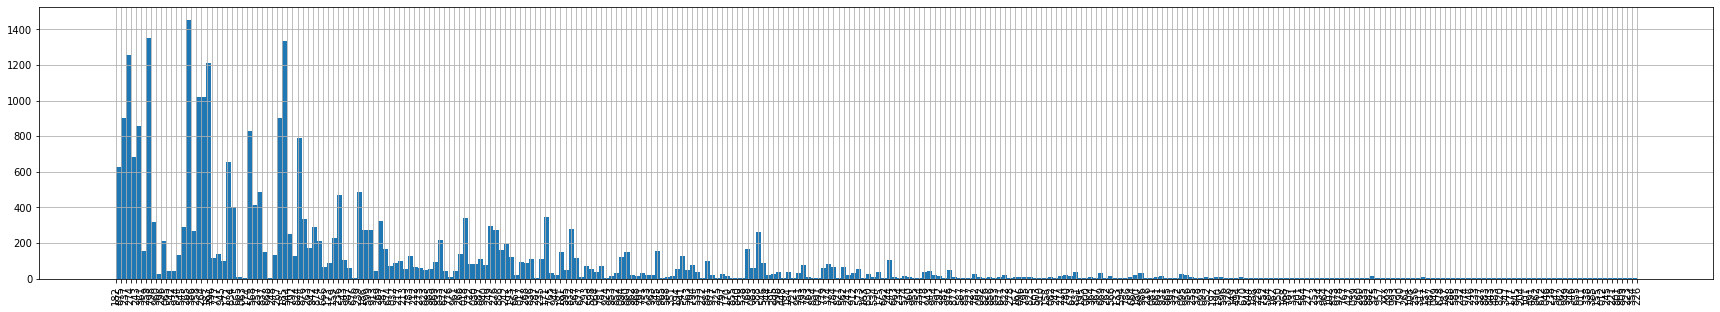

In [201]:
# Distribution
fig, ax = plt.subplots(figsize=(30,5))
df_listings.zip.hist(bins=302)
plt.xticks(rotation='vertical');

In [202]:
# Sort zipcode by highest value
df_listings.groupby('zip')['listing_id'].count().sort_values(ascending=False)

zip
265    1453
259    1350
185    1332
237    1253
183    1210
       ... 
347       1
346       1
334       1
327       1
xxx       1
Name: listing_id, Length: 302, dtype: int64

### property type

In [203]:
# Number and names of property types
print('Number of different property type:', df_listings.property_type.nunique())
print(df_listings.property_type.unique())

Number of different property type: 20
['holiday_apartment' 'holiday_houses' 'bungalow' 'villa' 'farmhouses'
 'cottage' 'guestroom' 'vineyard' 'hotel' 'pension' 'chalet'
 'organic_farm' 'house_boat' 'terraced_house' 'b_und_b' 'trailer'
 'alpine_hut' 'castle' 'residence' 'inn']


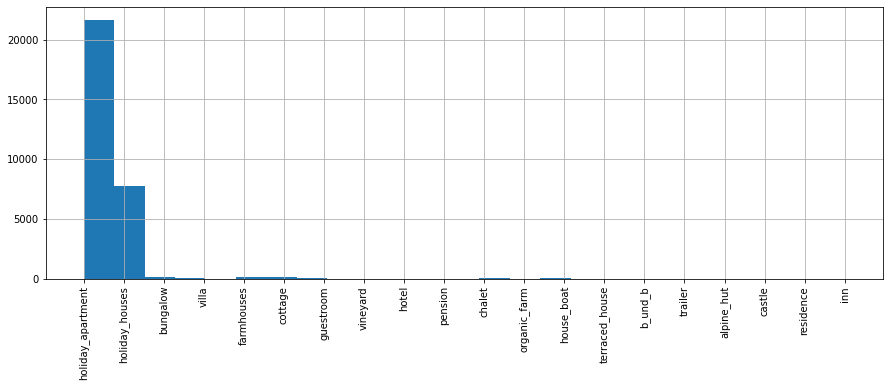

In [204]:
# Distribution
fig, ax = plt.subplots(figsize=(15,5))
df_listings.property_type.hist(bins=25)
plt.xticks(rotation='vertical');

In [205]:
# Sort property type by highest value
df_listings.groupby('property_type')['listing_id'].count().sort_values(ascending=False)

property_type
holiday_apartment    21646
holiday_houses        7738
bungalow               185
farmhouses             164
cottage                123
chalet                  97
guestroom               90
villa                   57
house_boat              55
terraced_house          25
pension                 24
alpine_hut              21
organic_farm            15
trailer                 10
b_und_b                  8
castle                   4
residence                4
hotel                    1
inn                      1
vineyard                 1
Name: listing_id, dtype: int64

## 7. Data Cleaning
### 1. Outliers in numerical values

First, we look at the boxplots to get an overview about the outliers in the numerical features. After this we look for different quantiles to decide the cut off threshold.

<AxesSubplot:>

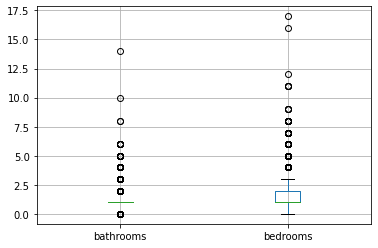

In [206]:
# boxplots bathrooms, bedrooms
df_listings.boxplot(column=['bathrooms', 'bedrooms'])

<AxesSubplot:>

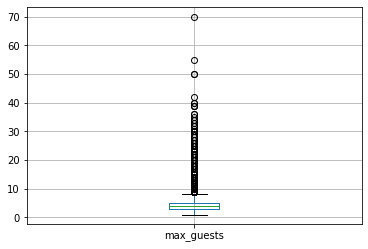

In [207]:
# boxplot maximum guests
df_listings.boxplot(column='max_guests')

<AxesSubplot:>

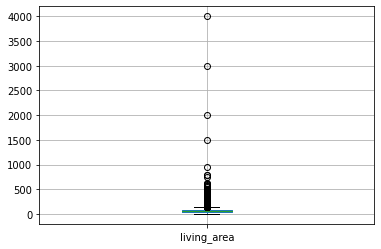

In [208]:
# boxplot living area
df_listings.boxplot(column='living_area')

We decided to go with the statistical procedure and cut off with quantile 0.95. For this, we look for the cut off threshold for all numerical features. With this procedure we drop extreme houses and set the focus to the 'standard' houses. The probability that a new customer has a 'standard' house is much higher than having a special house. So we want to model a good price calculator for 'standard' houses because for special houses the calculator would be inaccurate no matter if we keep them or not. 

In [209]:
# Calculate .95 quantile for numerical features
print('Quantiles 0.95 for:')
print('Bathrooms:', df_listings.bathrooms.quantile([.95]))
print('Bedrooms:', df_listings.bedrooms.quantile([.95]))
print('Maximum guests:', df_listings.max_guests.quantile([.95]))
print('Living_area:', df_listings.living_area.quantile([.95]))

Quantiles 0.95 for:
Bathrooms: 0.95    2.0
Name: bathrooms, dtype: float64
Bedrooms: 0.95    3.0
Name: bedrooms, dtype: float64
Maximum guests: 0.95    8.0
Name: max_guests, dtype: float64
Living_area: 0.95    140.0
Name: living_area, dtype: float64


### Cleaning procedure Outliers: we start with the bedrooms, continue with bathrooms, maximum guests and living area.

**A. Outliers bedrooms**

Drop all rows with a number of bedrooms greater than 3.

In [210]:
# How many rows do we drop?
print('Number of dropping rows:', df_listings.query('bedrooms > 3').shape[0])

Number of dropping rows: 870


In [211]:
# Get names of indexes for which column bedrooms has value greater than 3
indexNames_bedrooms = df_listings[df_listings['bedrooms'] > 3].index
# Delete these row indexes from dataset
df_listings.drop(indexNames_bedrooms , inplace=True)

**B. Outliers bathrooms**

Drop all rows with a number of bathrooms greater than 2.

In [212]:
# How many rows do we drop?
print('Number of dropping rows:',df_listings.query('bathrooms > 2').shape[0])

Number of dropping rows: 155


In [213]:
# Get names of indexes for which column bathrooms has value greater than 2
indexNames_bathrooms = df_listings[df_listings['bathrooms'] > 2].index
# Delete these row indexes from dataset
df_listings.drop(indexNames_bathrooms , inplace=True)

** C. Outliers maximum guests**

We drop all rows with a greater number of maximum guests than 8.

In [214]:
# How many rows do we drop?
print('Number of dropping rows:', df_listings.query('max_guests > 8').shape[0])

Number of dropping rows: 535


In [215]:
# Get names of indexes for which column maximum guests has value greater than 8
indexNames_guests = df_listings[df_listings['max_guests'] > 8].index
# Delete these row indexes from dataset
df_listings.drop(indexNames_guests , inplace=True)

** D. Outliers living area**

We drop all rows with a greater number of living area than 140.

In [216]:
# How many rows do we drop?
print('Number of dropping rows:', df_listings.query('living_area > 140').shape[0])

Number of dropping rows: 574


In [217]:
# Get names of indexes for which column living area has value greater than 140
indexNames_living_area = df_listings[df_listings['living_area'] > 140].index
# Delete these row indexes from dataset
df_listings.drop(indexNames_living_area , inplace=True)

### Description of numerical features after cleaning the dataset for outliers

In [218]:
# Looking for the description of the numerical features after dropping the outliers
df_listings[numerical_features.columns].describe()

,bathrooms,bedrooms,max_guests,living_area
count,27705.000000,27705.000000,27705.000000,27704.000000
mean,1.073344,1.386753,4.018408,67.984248
std,0.355181,0.726518,1.429580,24.061877
min,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,50.000000
50%,1.000000,1.000000,4.000000,65.000000
75%,1.000000,2.000000,5.000000,80.000000
max,2.000000,3.000000,8.000000,140.000000


### 3. Missing values

In [219]:
# Looking for missing values
df_listings.isna().sum()

listing_id                          0
customer_id                         0
state                               0
contract_end                        0
zip                                 0
region                              0
subregion                           1
holiday_region                      0
property_type                       0
subscription                        0
binding_inquiry                     0
option_allergic                     0
option_non_smoking_only             0
option_holiday_with_your_pet        0
option_holiday_with_your_horse      0
option_holiday_with_your_dog        0
option_close_to_the_beach           0
option_wheelchair_accessible        0
option_family_travel                0
option_close_to_the_water           0
option_holiday_with_your_baby       0
option_long_term_holiday            0
option_fully_accessible             0
option_technicians                  0
option_close_to_the_ski_lift        0
wheelchairaccess                    0
babybed     

We have one missing value in `subregion`, 430 missing values in `bathrooms`, `bedrooms`, and `max_guests`, 431 missing values in `living_area`, and 28 missing values in `lat`and `lng`because of wrong zip codes.

First, we drop the 430 rows with missing values for `bathrooms`, `bedrooms` and `max_guests`. 

In [220]:
# Drop the missing values
df_listings.dropna(subset=['bathrooms'], inplace=True)

In [221]:
# Drop the missing values
df_listings.dropna(subset=['lat'], inplace=True)

Second, we are looking for the two rows with missing values to decide how to replace them.

In [222]:
# Show rows with missing values to decide how to replace them
df_listings[df_listings.isnull().any(axis=1)]

,listing_id,customer_id,state,contract_end,zip,region,subregion,holiday_region,property_type,subscription,...,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,living_area,lat,lng
7844,5b5e6f3c-c78b-5577-a5c5-adca85a90a3e,c582e3cb-311e-5db6-ad4b-d55c42741f92,Online,2021-12-01,237,Ostsee,NaN,Ostsee,holiday_apartment,active,...,1,1,0,1,1.0,2.0,4.0,60.0,54.213914,10.844267
10917,6d0fd21a-0c86-57f1-a3ac-d79d3d831d2b,7719f9f9-c4d8-57f4-85d5-a777ec01a111,Online,2022-02-01,267,Nordsee,Ostfriesische Inseln,Nordsee,holiday_apartment,active,...,0,1,1,0,1.0,2.0,4.0,NaN,53.403534,7.154151


We decided to replace the subregion with the mode value for this zipcode (237--).

In [223]:
# Looking for the mode value for this zipcode and replace it
df_listings[df_listings['zip'] == '237']['subregion'].value_counts()

Lübecker Bucht    492
Fehmarn           480
Kieler Bucht      199
Schlei              1
Ostfriesland        1
Name: subregion, dtype: int64

Lübecker Bucht is the mode. So we replace with this value.

In [224]:
# Replace missing value with mode value for this zipcode
df_listings["subregion"] = df_listings["subregion"].fillna("Lübecker Bucht")

We calculate the mean living area for a property with 1 bathroom, 2 bedrooms, and a number of maximum guests of 4.

In [225]:
# Replace missing value with mean value for the property room numbers
df_listings["living_area"] = df_listings["living_area"].fillna(round(df_listings.query('bathrooms == 1 & bedrooms == 2 & max_guests == 4').mean()['living_area'], 1))

/var/folders/tk/3gx_4vh52k994g1fbvg_67pm0000gn/T/ipykernel_2789/1677410023.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_listings["living_area"] = df_listings["living_area"].fillna(round(df_listings.query('bathrooms == 1 & bedrooms == 2 & max_guests == 4').mean()['living_area'], 1))


### 3. Zero values
In the dataset are also zero values for bathrooms and bedrooms. Traum-Ferienwohnungen mentioned that this is possible for different reasons, so we keep this values.

In [226]:
# Zero values
print('Zero values')
print('Bathrooms:', df_listings.query('bathrooms == 0').shape[0])
print('Bedrooms:', df_listings.query('bedrooms == 0').shape[0])

Zero values
Bathrooms: 803
Bedrooms: 1756


## 8. New EDA after cleaning

### Distribution of the numerical features

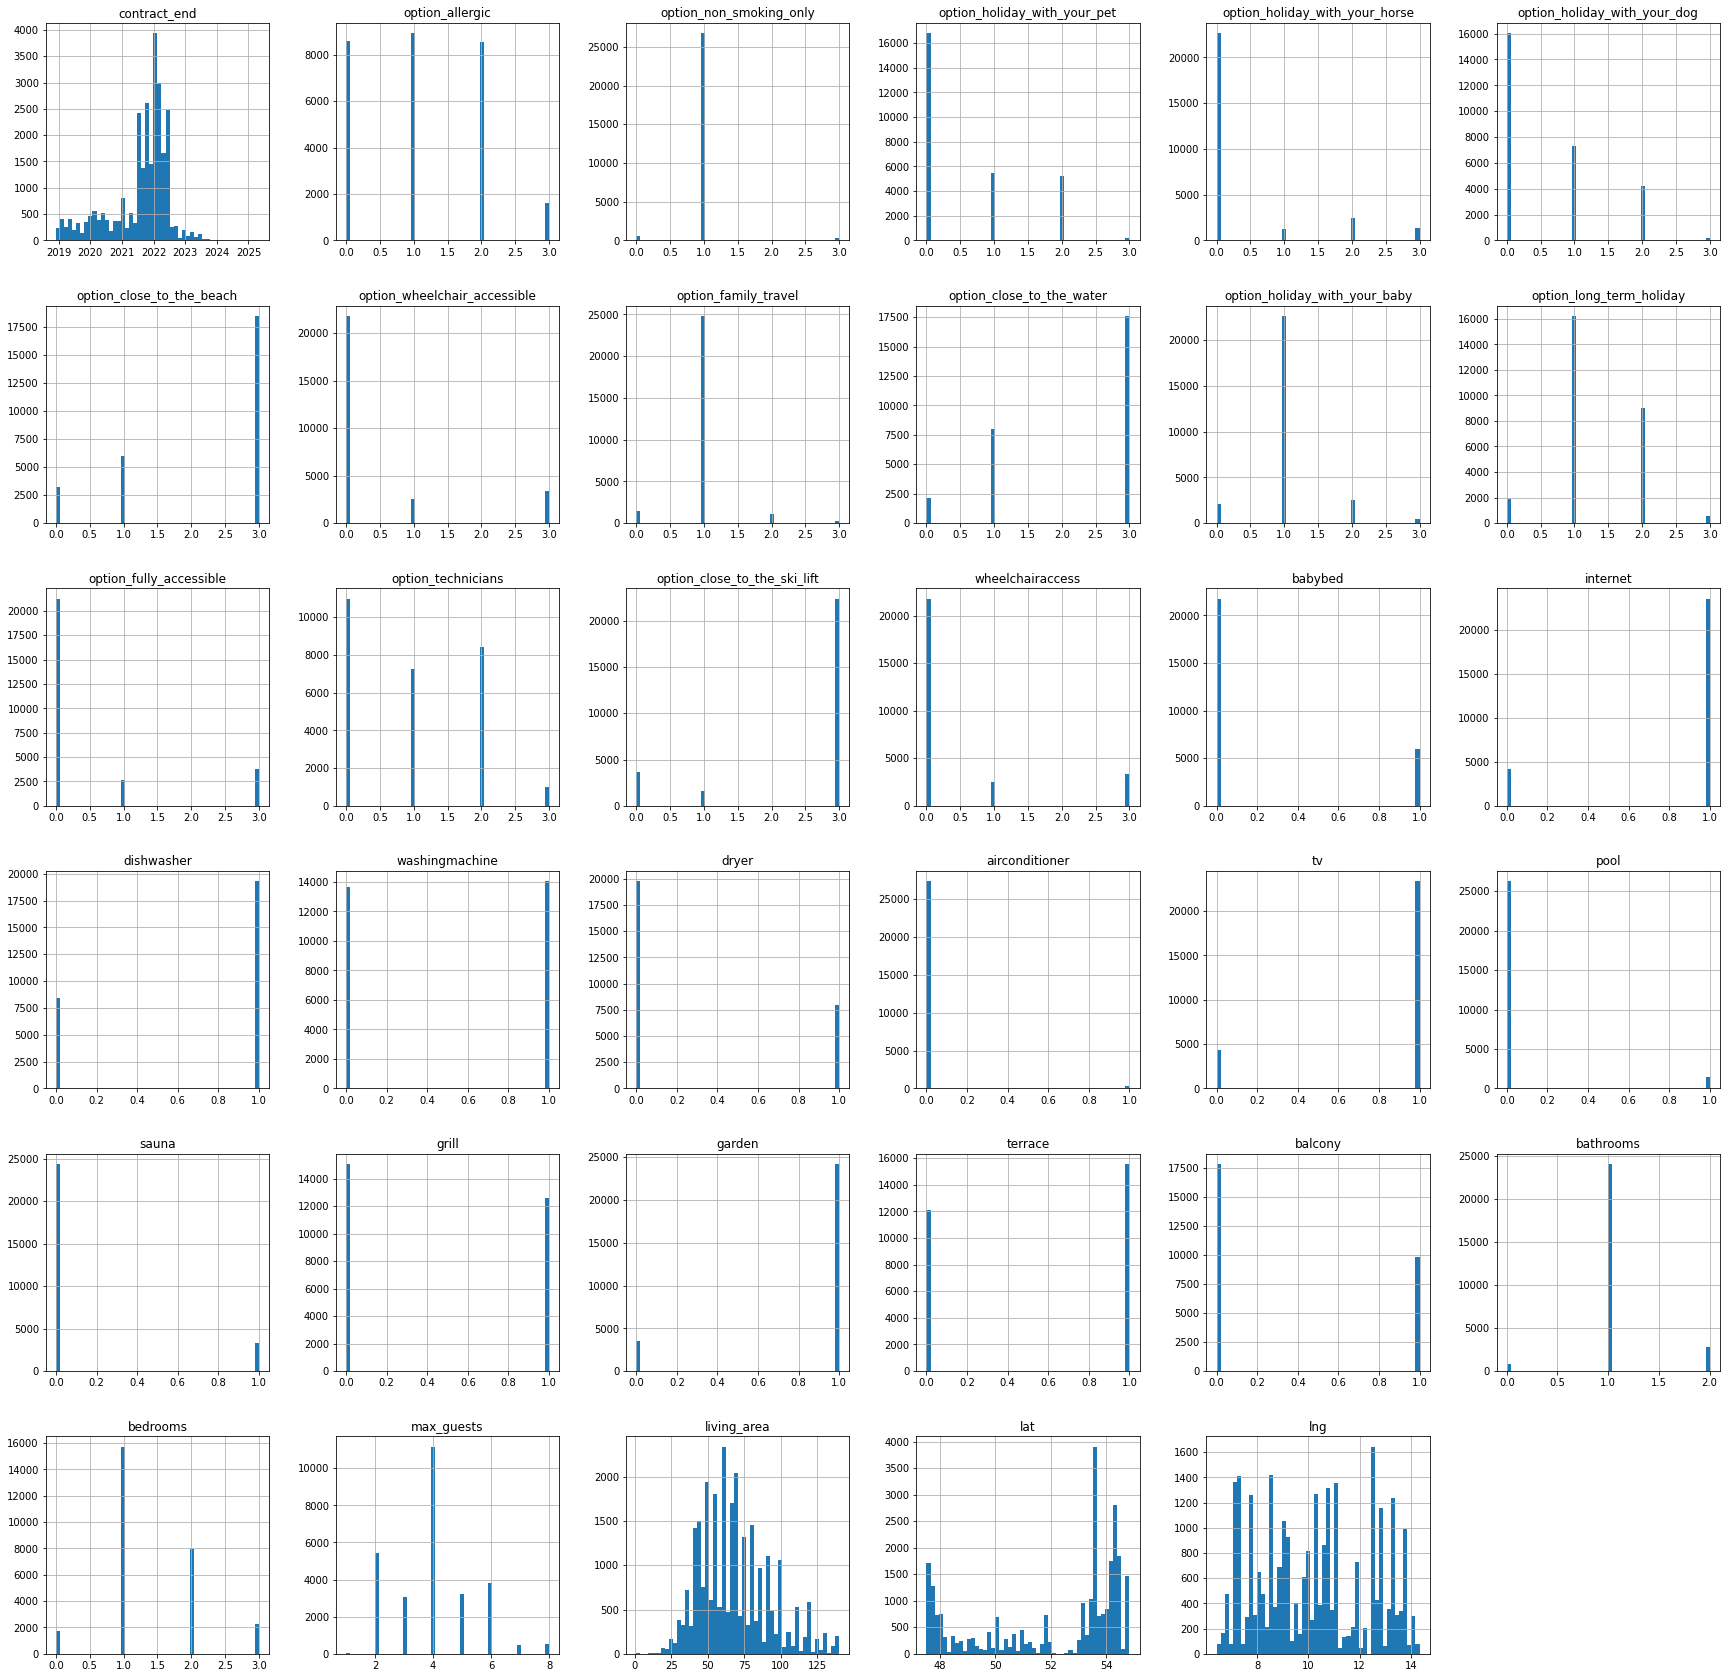

In [227]:
# Plotting histograms for the features 
df_listings.hist(bins=50, figsize = (30,30))
plt.show()

#### Closer look to some features

In [228]:
# Count values for categories
print('Non Smoking:\n', df_listings['option_non_smoking_only'].value_counts())
print('--------------------')
print('Airconditioner:\n', df_listings['airconditioner'].value_counts())
print('--------------------')
print('Family travel:\n', df_listings['option_family_travel'].value_counts())

Non Smoking:
 1    26737
0      592
3      349
2        1
Name: option_non_smoking_only, dtype: int64
--------------------
Airconditioner:
 0    27366
1      313
Name: airconditioner, dtype: int64
--------------------
Family travel:
 1    24799
0     1506
2     1073
3      301
Name: option_family_travel, dtype: int64


In [229]:
print('Percent of false values in feature')
print('Non smoking:', round(df_listings.query('option_non_smoking_only == 1').count()[1]/df_listings.shape[0]*100, 1))
print('Airconditioner:', round(df_listings.query('airconditioner == 0').count()[1]/df_listings.shape[0]*100, 1))
print('Family travel:', round(df_listings.query('option_family_travel == 1').count()[1]/df_listings.shape[0]*100, 1))

Percent of false values in feature
Non smoking: 96.6
Airconditioner: 98.9
Family travel: 89.6


Because of the high value for no airconditioner (98.9%) we drop this column because it has no information for us. We still keep the feature non smoking (96.6% true) because it's an important information for the guests.

In [230]:
# Drop airconditioner
df_listings = df_listings.drop('airconditioner', axis=1)

### Overview about the Regions

In [231]:
# Number and names of region
print(' Number of different regions:', df_listings.region.nunique())
print(' Number of different subregions:', df_listings.subregion.nunique())
print(' Number of different holiday regions:', df_listings.holiday_region.nunique())
print(' Number of different zipcodes:', df_listings.zip.nunique())

 Number of different regions: 29
 Number of different subregions: 193
 Number of different holiday regions: 29
 Number of different zipcodes: 274


We lost three subregions and eleve zipcodes with our data cleaning.

### Shape of the cleaned dataset

In [232]:
# Shape of the dataset
print('The dataset contains %s different properties and %s features.' %(df_listings.shape[0], df_listings.shape[1]))
print('The %s properties are owned by %s customers.' %(df_listings.shape[0], df_listings.customer_id.nunique()))
print('So in average each customer owns %s properties.' %(df_listings.shape[0]/df_listings.customer_id.nunique()))

The dataset contains 27679 different properties and 44 features.
The 27679 properties are owned by 18468 customers.
So in average each customer owns 1.498754602555772 properties.


In [233]:
## Save dataset in a new CSV
#df_listings.to_csv('../data/all_listings_cleaned_20210723.csv')

## 9. Filter property type

If we want to model a good price calculator for 'standard' houses we have to look at the property type again. As we saw in the EDA, the distribution is widely.

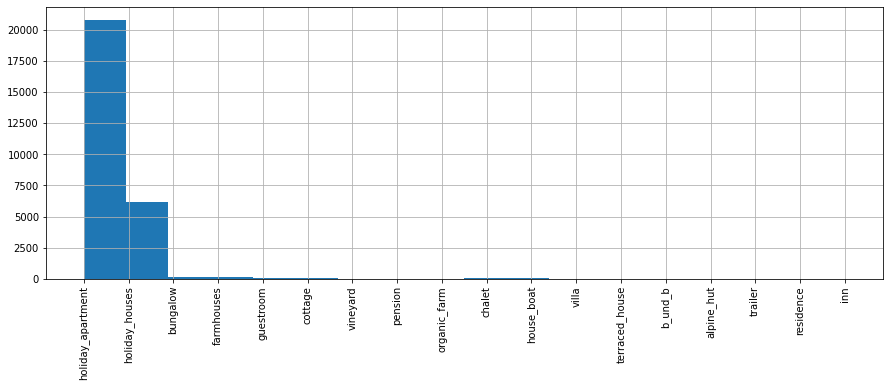

In [236]:
# Distribution
fig, ax = plt.subplots(figsize=(15,5))
df_listings.property_type.hist(bins=18)
plt.xticks(rotation='vertical');

In [235]:
# Sort property type by highest value
df_listings.groupby('property_type')['listing_id'].count().sort_values(ascending=False)

property_type
holiday_apartment    20807
holiday_houses        6186
bungalow               176
farmhouses             148
chalet                  74
cottage                 69
guestroom               69
house_boat              54
terraced_house          24
alpine_hut              17
organic_farm            14
villa                   14
pension                  8
b_und_b                  7
trailer                  6
residence                4
inn                      1
vineyard                 1
Name: listing_id, dtype: int64

We will keep the first two property types (holiday apartment, holiday houses.

In [237]:
# Drop special property types
df_listings = df_listings[df_listings['property_type'].isin(['holiday_apartment', 'holiday_houses'])]
print('The clean dataset contains:', df_listings.shape[0], 'unique properties.')

The clean dataset contains: 26993 unique properties.


## 10. Save cleaned dataset in a new CSV

In [238]:
# Export csv
#df_listings.to_csv('../data/master_listings_20210723.csv')